In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Conv2D,Flatten,Conv3D,UpSampling2D
from keras.models import Model
from keras import backend as K
from keras import losses
import tensorflow as tf
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from skimage.color import rgb2grey,gray2rgb
import os
#print(os.listdir("../input/flowers-recognition/flowers/flowers/rose"))

# Any results you write to the current directory are saved as output.

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True,device_count = {'CPU' : 1, 'GPU' : 0}))
K.set_session(sess)

In [5]:
flowerPath = "../flowers/flowers/"

datagen = ImageDataGenerator(rescale=(1/255))
flowerGen = datagen.flow_from_directory(flowerPath,batch_size=1,target_size=(512,512),class_mode='binary')

Found 4323 images belonging to 5 classes.


In [91]:
def convAutoEnc1(encoding_dim = 32, input_dim_x=512, input_dim_y=512):
    input_img = Input(shape=(None,None,1)) 

    encoded = Conv2D(1,(3,3),padding='same', activation='relu')(input_img)
    encoded = Conv2D(2,(3,3),padding='same', activation='relu')(encoded )
    encoded = Conv2D(3,(3,3),padding='same', activation='relu')(encoded )
    encoded = Conv2D(4,(3,3),padding='same', activation='relu')(encoded )
    out = Conv2D(3,(2,2),padding='same', activation='tanh')(encoded)

    # this model maps an input to its reconstruction
    return Model(input_img, out)

def convAutoEnc(encoding_dim = 32, input_dim_x=512, input_dim_y=512):
    input_img = Input(shape=(input_dim_x,input_dim_y,1)) 

    out = Conv2D(2,(2,2), activation='relu',strides = (2,2),padding="same")(input_img)
    out = Conv2D(3,(2,2), activation='relu', strides = (4,4),padding="same")(input_img)
    out = UpSampling2D((4,4))(out)
    out = Conv2D(3,(1,1), activation='tanh',padding="same")(out)
    # this model maps an input to its reconstruction
    return Model(input_img, out)

In [92]:
ae1 = convAutoEnc(100)
ae1.compile(optimizer='adadelta', loss='mean_squared_error')
ae1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 128, 128, 3)       15        
_________________________________________________________________
up_sampling2d_40 (UpSampling (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 512, 512, 3)       12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [102]:
img = flowerGen[3][0][0]
greyImg = rgb2grey(img)
ae1.fit(greyImg.reshape(1,512,512,1),img[:,:,:].reshape(1,512,512,3), epochs=100,batch_size=1,verbose=1)

ValueError: Error when checking target: expected conv2d_105 to have 4 dimensions, but got array with shape (512, 512, 3)

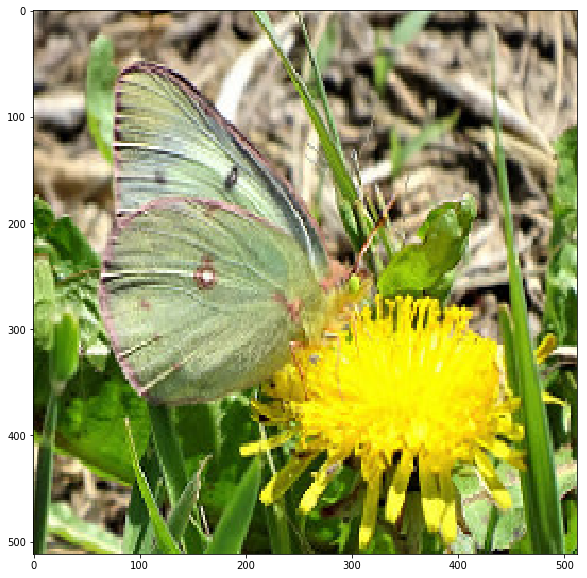

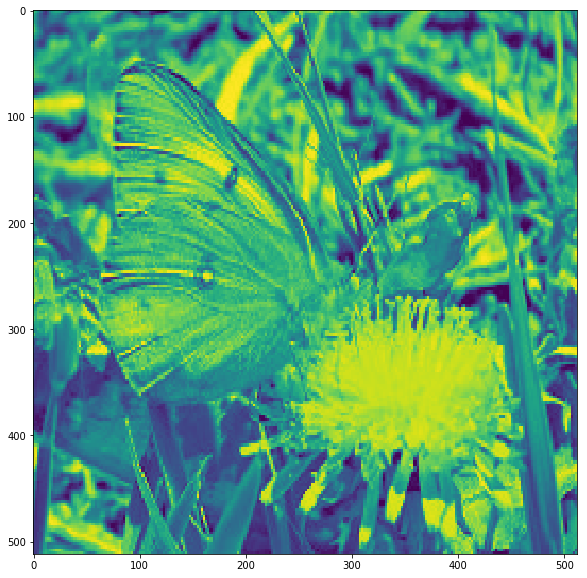

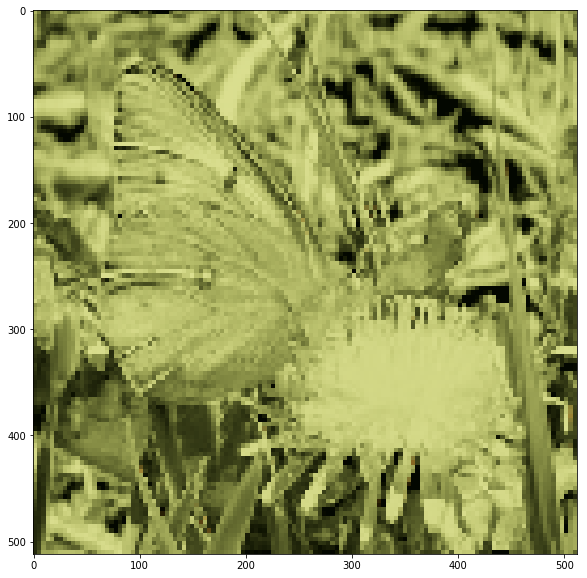

In [101]:

#img = flowerGen[20][0][0]
# mngreyImg = rgb2grey(img)

res =gray2rgb(np.clip(ae1.predict(greyImg.reshape(1,512,512,1)).reshape(512,512,3),0,1))
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(greyImg)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(res)
plt.show()

In [150]:
mseRes = sess.run(losses.mean_squared_error(img,res))

In [139]:
mseRes

array([[0.15658428, 0.02394948, 0.01479158, ..., 0.00368771, 0.00379563,
        0.00681627],
       [0.12814578, 0.00418595, 0.00046461, ..., 0.00196746, 0.00266637,
        0.00465209],
       [0.11694565, 0.00028992, 0.00060335, ..., 0.00077919, 0.00131153,
        0.00463839],
       ...,
       [0.00862869, 0.01200056, 0.01226835, ..., 0.0127386 , 0.00249457,
        0.02002915],
       [0.00636879, 0.00835011, 0.0043827 , ..., 0.00632859, 0.03265875,
        0.01632956],
       [0.009094  , 0.01189627, 0.00697008, ..., 0.02263916, 0.016236  ,
        0.00957786]], dtype=float32)

In [144]:
img[0,0,2]

0.85098046

In [145]:
res[0,0,2]

0.48991016